In [27]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [28]:
# 경로를 os.path.join()으로 수정
data_dir = os.path.join(os.getenv('HOME'), 'aiffel/kaggle_kakr_housing/data')

# train, test 데이터 경로 설정
train_data_path = os.path.join(data_dir, 'train.csv')
test_data_path = os.path.join(data_dir, 'test.csv')

# 데이터 로드
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

# 확인 메시지 출력
print('됐어?')

print (train.shape)
print (test.shape)

display (train)
display (test)

됐어?
(15035, 21)
(6468, 20)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,21498,20140626T000000,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
6464,21499,20150126T000000,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
6465,21500,20150219T000000,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
6466,21501,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [29]:
#원본 파일을 카피
train_og = train.copy()
test_og = test.copy()


In [30]:
#훈련과 테스트 세트에서 학습을 위해서 target 을 분리
y = train['price']
train = train.drop(columns=['price'])

In [31]:
# train 데이터 갯수 저장
train_len = len(train)
print(train_len)

# 총 데이터의 합
data = pd.concat((train, test), axis=0) 

display (data)
print(len(data))

test_id = data['id'][train_len:]  
data = data.drop(columns=['id']) 

print(data.columns)



15035


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,21498,20140626T000000,3,1.75,1500,11968,1.0,0,0,3,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
6464,21499,20150126T000000,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
6465,21500,20150219T000000,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
6466,21501,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


21503
Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [35]:
data_og = data.copy()

In [43]:
import missingno as msno
print(missingno.__version__)

0.5.0


<AxesSubplot:>

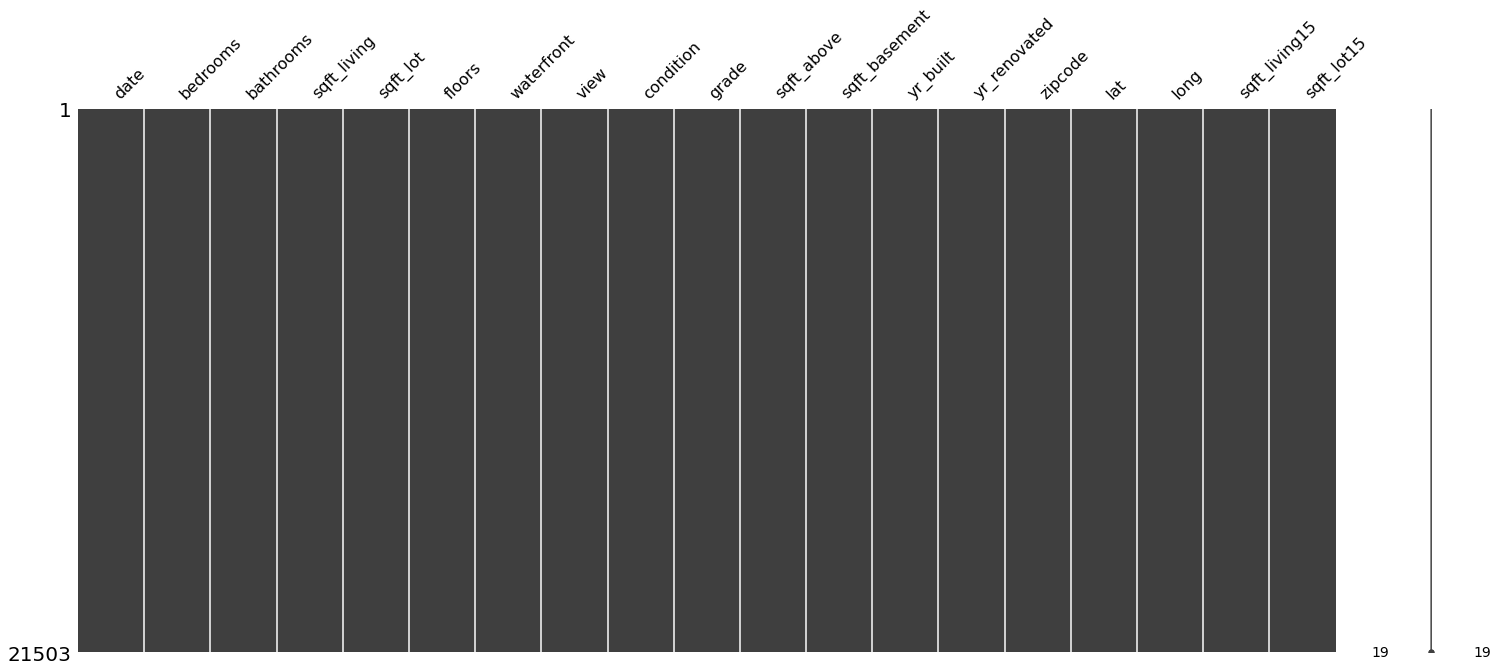

In [44]:

# data 결측값 확인
msno.matrix(data)

In [45]:
print(data.isnull().sum())  # Shows missing values for each column

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [46]:
#앞에 date 6 숫자만 남기고 int로 변환 후에 다시 df로 반환 해준다 
def convert_date(df: pd.DataFrame) -> pd.DataFrame:
    df['date'] = df['date'].apply(lambda x: int(str(x)[:6]))
    return df

data = convert_date(data)

print (data)

        date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     201410         3       1.00         1180      5650     1.0           0   
1     201502         2       1.00          770     10000     1.0           0   
2     201502         3       2.00         1680      8080     1.0           0   
3     201406         3       2.25         1715      6819     2.0           0   
4     201501         3       1.50         1060      9711     1.0           0   
...      ...       ...        ...          ...       ...     ...         ...   
6463  201406         3       1.75         1500     11968     1.0           0   
6464  201501         3       2.00         1490      1126     3.0           0   
6465  201502         3       2.50         1310      1294     2.0           0   
6466  201406         2       0.75         1020      1350     2.0           0   
6467  201501         3       2.50         1600      2388     2.0           0   

      view  condition  grade  sqft_abov

In [47]:
data_og = data.copy()

print (data_og)

        date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0     201410         3       1.00         1180      5650     1.0           0   
1     201502         2       1.00          770     10000     1.0           0   
2     201502         3       2.00         1680      8080     1.0           0   
3     201406         3       2.25         1715      6819     2.0           0   
4     201501         3       1.50         1060      9711     1.0           0   
...      ...       ...        ...          ...       ...     ...         ...   
6463  201406         3       1.75         1500     11968     1.0           0   
6464  201501         3       2.00         1490      1126     3.0           0   
6465  201502         3       2.50         1310      1294     2.0           0   
6466  201406         2       0.75         1020      1350     2.0           0   
6467  201501         3       2.50         1600      2388     2.0           0   

      view  condition  grade  sqft_abov

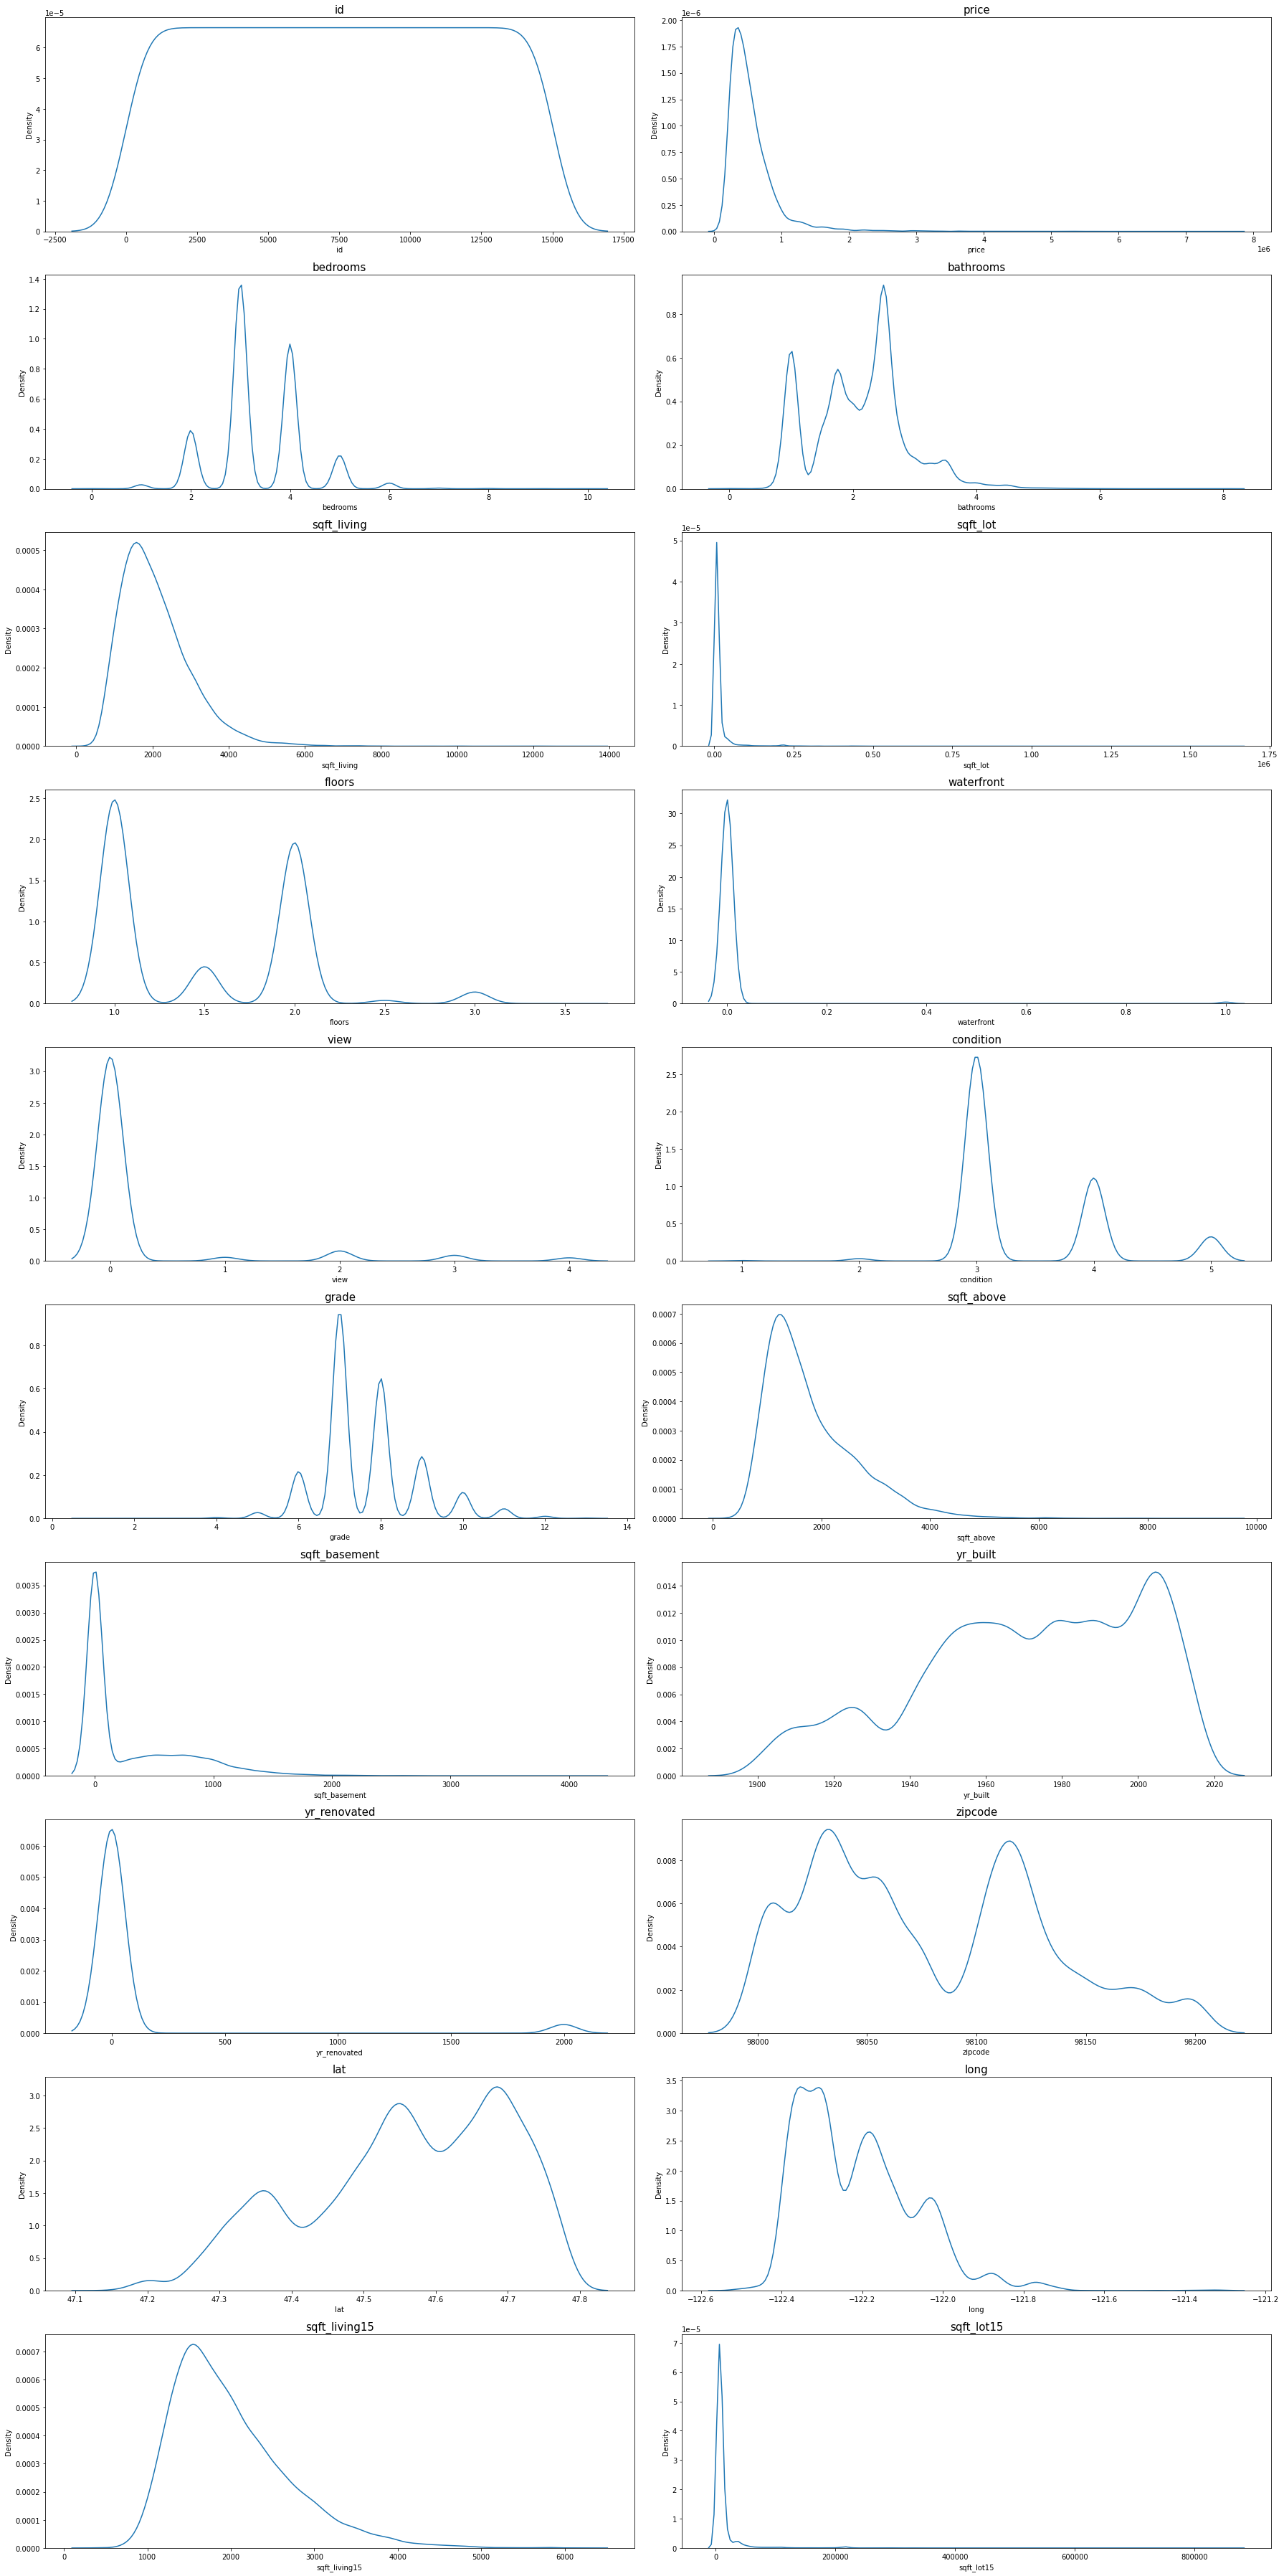

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# KDE Plot을 그리는 함수
def plot_kde_grid(data, rows=10, cols=2, figsize=(12, 50), columns=None):
    fig, ax = plt.subplots(rows, cols, figsize=figsize)  # 10행 2열의 서브플롯
    ax = ax.flatten()  # 2D 배열을 1D로 변환 (IndexError 방지)
    
    if columns is None:
        columns = data.columns[1:rows * cols + 1]  # 첫 번째 id 컬럼 제외하고 19개 선택
    
    for count, column in enumerate(columns):
        try:
            sns.kdeplot(data=data[column], ax=ax[count])
            ax[count].set_title(column, fontsize=15)
        except IndexError:
            break

    plt.tight_layout()  # 그래프 간격 자동 조정
    plt.show()

# 데이터 로드 
train = pd.read_csv(train_data_path)

# 사용 예시
plot_columns = train.columns.drop(['date'])  # 'date' 컬럼 제외
plot_kde_grid(train, 10, 2, (25, 50), plot_columns)


In [50]:
#data skeweness 확인 

# 데이터의 왜도 계산
skew_values = data.skew().sort_values(ascending=False)

print (skew_values)

sqft_lot         13.063414
waterfront       11.355434
sqft_lot15        9.509190
yr_renovated      4.539105
view              3.392064
bedrooms          1.983385
sqft_basement     1.576345
sqft_living       1.471414
sqft_above        1.446008
sqft_living15     1.106594
condition         1.036647
long              0.884048
grade             0.770530
date              0.764380
floors            0.613499
bathrooms         0.510653
zipcode           0.407406
yr_built         -0.471730
lat              -0.486830
dtype: float64


In [51]:
skewness = data.columns[abs(data.skew()) > 1]
print(skewness)

Index(['bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view',
       'condition', 'sqft_above', 'sqft_basement', 'yr_renovated',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


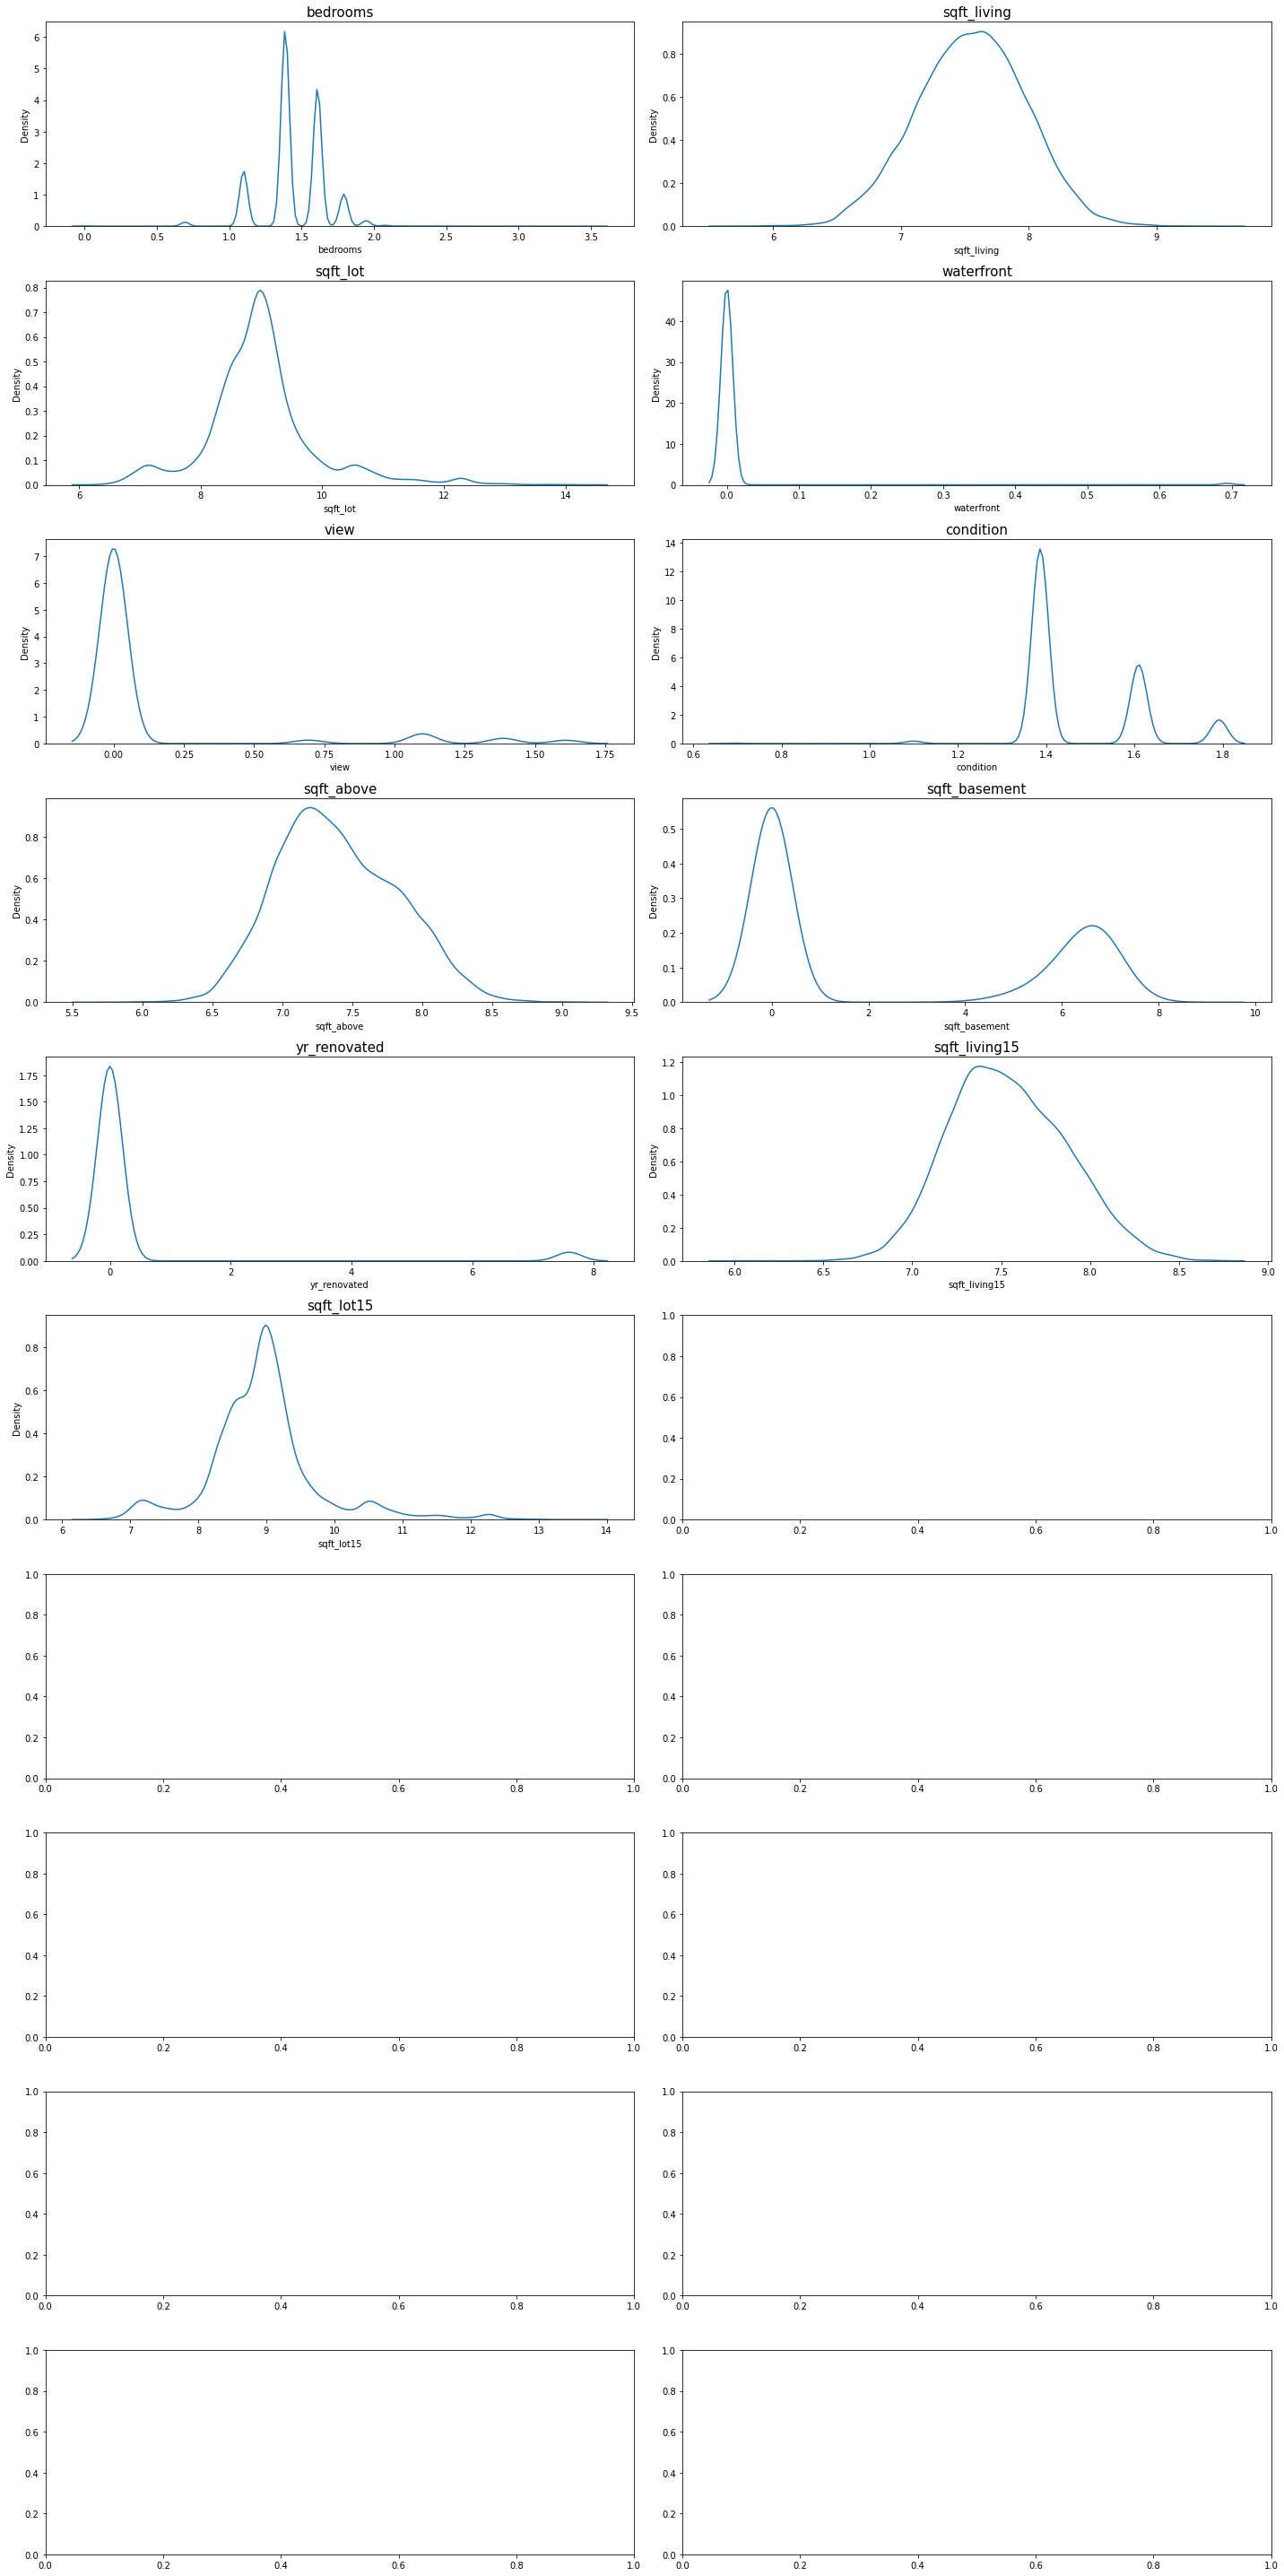

In [52]:

def log_transform(df: pd.DataFrame, skewness: list):
    for column in skewness:
        df[column] = np.log1p(df[column].values)
    return df

# 로그 변환
data = log_transform(data, skewness)

#  plot를 만들어서 확인
plot_kde_grid(data, 10, 2, (20,40), skewness)

In [2]:
skewness = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_lot15', 'sqft_living15']

In [ ]:
data = log_transform(data_og, skewness)

In [ ]:
print (data)
display (data.shape)

data1= data.copy()

In [ ]:
plot_kde_grid(data, 3, 2, (25, 50), skewness)

In [ ]:
sns.kdeplot(y)
plt.show()

#로그 변환 
y = np.log1p(y)

sns.kdeplot(y)
plt.show()

In [ ]:
train = data.to_numpy()[:train_len, :]
test = data.to_numpy()[train_len:, :]

print(train.shape)
print(test.shape)

In [ ]:
#필요한 모델 라이브러리에서 불러오기
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import lightgbm
import missingno
import sklearn

print(xgboost.__version__)
print(lightgbm.__version__)
print(missingno.__version__)
print(sklearn.__version__)

In [ ]:
random_state = 2020

models = {
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=100),
    "LightGBM": LGBMRegressor(random_state=2023),
    "RandomForest": RandomForestRegressor(random_state=7)
}

def rmse(y_true, y_pred):
    y_true, y_pred = np.expm1(y_true), np.expm1(y_pred)  # Reverse log transformation
    return np.sqrt(mean_squared_error(y_true, y_pred))

def scores(models, train, y):
    df = {}

    for model_name, model in models.items():  # ✅ Corrected the loop
        X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=45)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_test, y_pred)

    # Convert dictionary to DataFrame after all models are evaluated
    score_df = pd.DataFrame.from_dict(df, orient='index', columns=['RMSE']).sort_values('RMSE', ascending=False)
    
    return score_df

In [ ]:
# 하이퍼 파라미터 튜닝 전 성능 확인
scores(models, train, y)

In [ ]:
def scores(models, train, y):
    df = {}

    for model in models:
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=45)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_test, y_pred)

    return pd.DataFrame(df, index=["RMSE"]).T.sort_values("RMSE", ascending=False)

In [ ]:
gboost_1= GradientBoostingRegressor(random_state=random_state, learning_rate= 0.1, max_depth= 5, n_estimators= 500)
xgboost_1 = XGBRegressor(random_state=random_state, learning_rate=0.1, max_depth=9)
lightgbm_1 = LGBMRegressor(random_state=random_state, learning_rate=0.1, max_depth=9)
rdforest_1 = RandomForestRegressor(random_state=random_state, max_depth=10, n_estimators=500)

models_gbt = [gboost_1]
models_xgb = [xgboost_1]
models_lgm = [lightgbm_1]
models_rdf = [rdforest_1]

scores(models_gbt, train, y)
scores(models_xgb, train, y)
scores(models_lgm, train, y)
scores(models_rdf, train, y)